# Hypertrace

### What is Hypertrace?

### What is Surface Biology and Geology?

### How to Extract Hypertrace Data and Run it with Python

In [ ]:
# Make sure you are in the py-hypertrace directory
cd ~/projects/isofit/examples/py-hypertrace
# ...and that you have activated the right conda environment
conda activate env-hypertrace
# Download sRTMnet
curl 'https://zenodo.org/record/4096627/files/sRTMnet_v100.zip?download=1' -L --output sRTMnet_v100.zip
# Create a new directory and extract sRTMnet into it
mkdir sRTMnet_v100
unzip sRTMnet_v100.zip -d sRTMnet_v100
# Download ancillary Hypertrace data
curl 'https://github.com/ashiklom/isofit/releases/download/hypertrace-data/hypertrace-data.tar.gz' -L --output hypertrace-data.tar.gz
# Extract Hypertrace data
tar xvf hypertrace-data.tar.gz
# You should now be ready to run Hypertrace.
# Run an example simulation as follows
#
# NOTE: Before running, you double check that you are in the right conda environment (env-hypertrace)
# and in the right directory (py-hypertrace)
python workflow.py configs/example-srtmnet.json
python summarize.py configs/example-srtmnet.json

### Example Data

In [ ]:
.
└── atm_ATM_MIDLAT_SUMMER__alt_99.90__doy_200__lat_34.150__lon_-118.140
    ├── az_0.00__zen_157.50__time_10.00__elev_0.01
    │   └── noise_noise_coeff_sbg_cbe0
    │       └── prior_surface_EMIT__inversion_inversion
    │           ├── aod_0.200__h2o_1.000
    │           │   └── cal_NONE__draw_0__scale_0
    │           │       ├── atmospheric-coefficients
    │           │       ├── atmospheric-coefficients.hdr
    │           │       ├── estimated-reflectance
    │           │       ├── estimated-reflectance.hdr
    │           │       ├── estimated-state
    │           │       ├── estimated-state.hdr
    │           │       ├── forward.json
    │           │       ├── fwd_lut
    │           │       │   ├── AOT550-0.2000_H2OSTR-1.0000
    │           │       │   ├── LUT_AOT550-0.2000_H2OSTR-1.0000.inp
    │           │       │   └── LUT_AOT550-0.2000_H2OSTR-1.0000.sh
    │           │       ├── fwd_lut_rhoatm.pkl
    │           │       ├── fwd_lut_sphalb.pkl
    │           │       ├── fwd_lut_transm.pkl
    │           │       ├── fwd_lut_transup.pkl
    │           │       ├── inverse.json
    │           │       ├── obs.txt
    │           │       ├── posterior-uncertainty
    │           │       ├── posterior-uncertainty.hdr
    │           │       ├── toa-radiance
    │           │       └── toa-radiance.hdr
    │           └── aod_0.300__h2o_2.000
    │               └── cal_NONE__draw_0__scale_0
    │                   ├── atmospheric-coefficients
    │                   ├── atmospheric-coefficients.hdr
    │                   ├── estimated-reflectance
    │                   ├── estimated-reflectance.hdr
    │                   ├── estimated-state
    │                   ├── estimated-state.hdr
    │                   ├── forward.json
    │                   ├── fwd_lut
    │                   │   ├── AOT550-0.3000_H2OSTR-2.0000
    │                   │   ├── LUT_AOT550-0.3000_H2OSTR-2.0000.inp
    │                   │   └── LUT_AOT550-0.3000_H2OSTR-2.0000.sh
    │                   ├── fwd_lut_rhoatm.pkl
    │                   ├── fwd_lut_sphalb.pkl
    │                   ├── fwd_lut_transm.pkl
    │                   ├── fwd_lut_transup.pkl
    │                   ├── inverse.json
    │                   ├── obs.txt
    │                   ├── posterior-uncertainty
    │                   ├── posterior-uncertainty.hdr
    │                   ├── toa-radiance
    │                   └── toa-radiance.hdr


## Example Experiments with Hypertrace

In [4]:
import spectral as sp
import numpy as np
import matplotlib.pyplot as plt
import os
import json

def fileList(path):
    filelist = []
    for root, subdirs, files in os.walk(path):
        for file in files:
            filelist.append(os.path.join(root,file))
    return filelist

### Effects of AOD on Different Factors of Hypertrace Data

#### What is varied: ####

"hypertrace": {
        "atm_aod_h2o": [["ATM_MIDLAT_SUMMER", **0.05**, 1.0], ["ATM_MIDLAT_SUMMER", **0.1**, 1.0], ["ATM_MIDLAT_SUMMER", **0.3**, 1.0]],
        "observer_zenith": [0],
        "inversion_mode": ["inversion"],
        "noisefile": ["./hypertrace-data/noise/noise_coeff_sbg_cbe0.txt"],
        "surface_file": ["./hypertrace-data/priors/aviris-ng/surface_EMIT.mat"]

In [5]:
filelist1 = fileList("/home/jovyan/efs/kpullela/hypertrace-output/example-07/atm_ATM_MIDLAT_SUMMER__alt_99.90__doy_200__lat_34.150__lon_-118.140/az_0.00__zen_157.50__time_10.00__elev_0.01")


### Section 1
TOA Radiance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


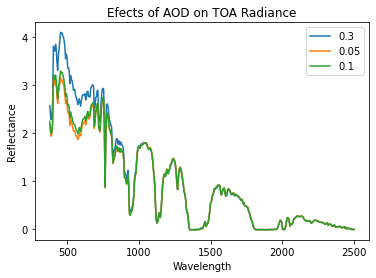

In [6]:
for name in filelist1:
    if "toa-radiance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['radiative_transfer']['lut_grid']['AOT550'][0]
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of AOD on TOA Radiance")
plt.show()

### Section 2
Estimated Reflectance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


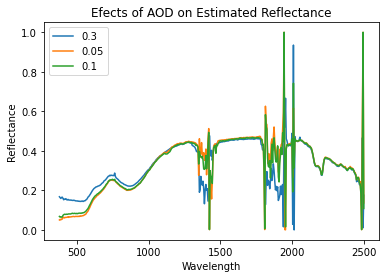

In [7]:
for name in filelist1:
    if "estimated-reflectance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['radiative_transfer']['lut_grid']['AOT550'][0]
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of AOD on Estimated Reflectance")
plt.show()

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


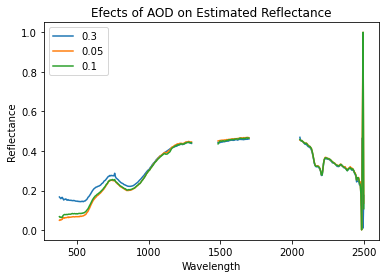

In [8]:
for name in filelist1:
    if "estimated-reflectance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['radiative_transfer']['lut_grid']['AOT550'][0]
            reflectance[np.logical_and(wavelengths > 1300, wavelengths < 1480)] = np.nan
            reflectance[np.logical_and(wavelengths > 1700, wavelengths < 2050)] = np.nan
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of AOD on Estimated Reflectance")
plt.show()

### Section 3
Posterior Uncertainty Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


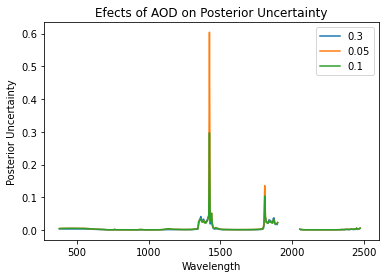

In [9]:
for name in filelist1:
    if "posterior-uncertainty.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        reflectance = reflectance[:len(reflectance)-2]
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['radiative_transfer']['lut_grid']['AOT550'][0]
            reflectance[np.logical_and(wavelengths > 1900, wavelengths < 2050)] = np.nan
            reflectance[np.logical_and(wavelengths > 2480, wavelengths < 2500)] = np.nan
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Posterior Uncertainty")
plt.title("Efects of AOD on Posterior Uncertainty")
plt.show()

### Effects of H2O on Different Factors of Hypertrace Data

#### What was varied: ####

"hypertrace": {
        "atm_aod_h2o": [["ATM_MIDLAT_SUMMER", 0.1, **0.5**], ["ATM_MIDLAT_SUMMER", 0.1, **1.0**], ["ATM_MIDLAT_SUMMER", 0.1, **3.0**]],
        "observer_zenith": [0],
        "inversion_mode": ["inversion"],
        "noisefile": ["./hypertrace-data/noise/noise_coeff_sbg_cbe0.txt"],
        "surface_file": ["./hypertrace-data/priors/aviris-ng/surface_EMIT.mat"]
    }

In [10]:
filelist2 = fileList('/home/jovyan/efs/kpullela/hypertrace-output/example-08/atm_ATM_MIDLAT_SUMMER__alt_99.90__doy_200__lat_34.150__lon_-118.140/az_0.00__zen_180.00__time_10.00__elev_0.01')


### Section 1
TOA Radiance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


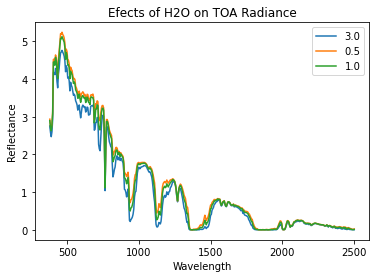

In [11]:
for name in filelist2:
    if "toa-radiance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['radiative_transfer']['lut_grid']['H2OSTR'][0]
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of H2O on TOA Radiance")
plt.show()

### Section 2
Estimated Reflectance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


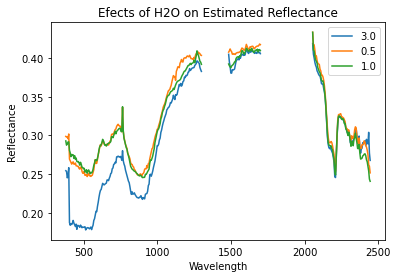

In [12]:
for name in filelist2:
    if "estimated-reflectance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['radiative_transfer']['lut_grid']['H2OSTR'][0]
            reflectance[np.logical_and(wavelengths > 1300, wavelengths < 1480)] = np.nan
            reflectance[np.logical_and(wavelengths > 1700, wavelengths < 2050)] = np.nan
            reflectance[(wavelengths > 2450)] = np.nan
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of H2O on Estimated Reflectance")
plt.show()

### Section 3
Posterior Uncertainty Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


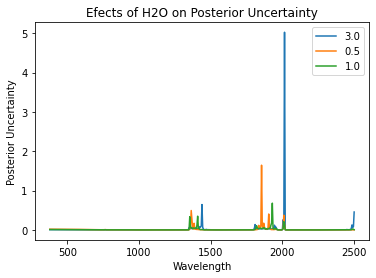

In [13]:
for name in filelist2:
    if "posterior-uncertainty.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        reflectance = reflectance[:len(reflectance)-2]
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['radiative_transfer']['lut_grid']['H2OSTR'][0]
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Posterior Uncertainty")
plt.title("Efects of H2O on Posterior Uncertainty")
plt.show()

### Effects of Observer Zenith Angle on Different Factors of Hypertrace Data

#### What was varied: ####

"hypertrace": {
        "atm_aod_h2o": [["ATM_MIDLAT_SUMMER", 0.1, 1.0], ["ATM_MIDLAT_SUMMER", 0.1, 1.0], ["ATM_MIDLAT_SUMMER", 0.1, 1.0]],
        "observer_zenith": [**0, 4, 7, 12**],
        "inversion_mode": ["inversion"],
        "noisefile": ["./hypertrace-data/noise/noise_coeff_sbg_cbe0.txt"],
        "surface_file": ["./hypertrace-data/priors/aviris-ng/surface_EMIT.mat"]
    }

In [14]:
filelist3 = fileList('/home/jovyan/efs/kpullela/hypertrace-output/example-10')

### Section 1
TOA Radiance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


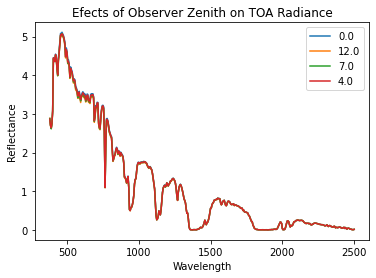

In [15]:
for name in filelist3:
    if "toa-radiance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/obs.txt"
        with open(new_name) as f:
            list = [word for line in f for word in line.split()]
            num = float(list[2])
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of Observer Zenith on TOA Radiance")
plt.show()

### Section 2
Estimated Reflectance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


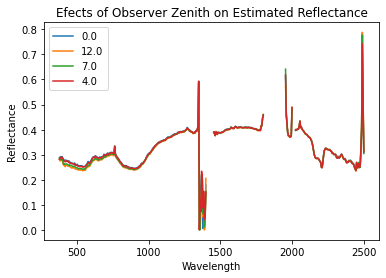

In [16]:
for name in filelist3:
    if "estimated-reflectance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/obs.txt"
        with open(new_name) as f:
            list = [word for line in f for word in line.split()]
            num = float(list[2])
            reflectance[np.logical_and(wavelengths > 2000, wavelengths < 2020)] = np.nan
            reflectance[np.logical_and(wavelengths > 1400, wavelengths < 1450)] = np.nan
            reflectance[np.logical_and(wavelengths > 1800, wavelengths < 1950)] = np.nan
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of Observer Zenith on Estimated Reflectance")
plt.show()

### Section 3
Posterior Uncertainty Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


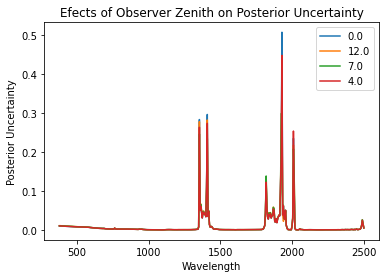

In [17]:
for name in filelist3:
    if "posterior-uncertainty.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        reflectance = reflectance[:len(reflectance)-2]
        new_name = os.path.dirname(name) + "/obs.txt"
        with open(new_name) as f:
            list = [word for line in f for word in line.split()]
            num = float(list[2])
        plt.plot(wavelengths, reflectance, label = num)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Posterior Uncertainty")
plt.title("Efects of Observer Zenith on Posterior Uncertainty")
plt.show()

### Effects of Noise Files on Different Factors of Hypertrace

#### What was varied: ####

"hypertrace": {
        "atm_aod_h2o": [["ATM_MIDLAT_SUMMER", 0.2, 1.0]],
        "observer_zenith": [0],
        "inversion_mode": ["inversion"],
        "noisefile": [**"./hypertrace-data/noise/chps_noise.txt", "./hypertrace-data/noise/noise_coeff_sbg_cbe0.txt", "./hypertrace-data/noise/noise_coeff_sbg_cbe1.txt", "./hypertrace-data/noise/noise_coeff_sbg_cbe2.txt", "./hypertrace-data/noise/noise_coeff_sbg_cbe3.txt", "./hypertrace-data/noise/noise_coeff_sbg_cbe4.txt"**],
        "surface_file": ["./hypertrace-data/priors/aviris-ng/surface_EMIT.mat"]
    }

In [18]:
filelist4 = fileList('/home/jovyan/efs/kpullela/hypertrace-output/example-noise')

### Section 1
TOA Radiance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


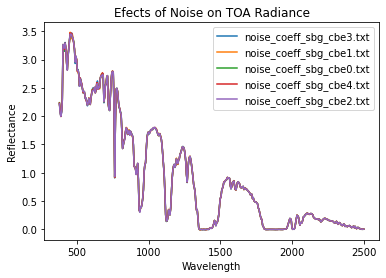

In [19]:
for name in filelist4:
    if "toa-radiance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['instrument']['parametric_noise_file']
            n = os.path.split(num)[1]
        plt.plot(wavelengths, reflectance, label = n)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of Noise on TOA Radiance")
plt.show()

### Section 2
Estimated Reflectance Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


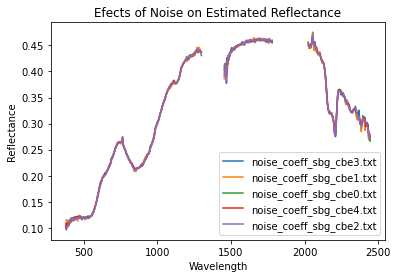

In [20]:
for name in filelist4:
    if "estimated-reflectance.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['instrument']['parametric_noise_file']
            n = os.path.split(num)[1]
        reflectance[np.logical_and(wavelengths > 1300, wavelengths < 1450)] = np.nan
        reflectance[np.logical_and(wavelengths > 1780, wavelengths < 2020)] = np.nan
        reflectance[(wavelengths > 2450)] = np.nan
        plt.plot(wavelengths, reflectance, label = n)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Efects of Noise on Estimated Reflectance")
plt.show()

### Section 3
Posterior Uncertainty Graph

spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.
spectral:WARNING: Unable to parse bad band list (bbl) in ENVI header as integers.


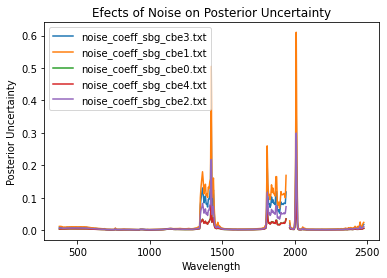

In [21]:
for name in filelist4:
    if "posterior-uncertainty.hdr" in name:
        image = sp.open_image(name)
        wavelengths = np.array(image.metadata["wavelength"], dtype=float)
        reflectance = image[0,0]  # Load the first pixel
        reflectance = reflectance[:len(reflectance)-2]
        new_name = os.path.dirname(name) + "/forward.json"
        with open(new_name) as json_file:
            data = json.load(json_file)
            num = data['forward_model']['instrument']['parametric_noise_file']
            n = os.path.split(num)[1]
            reflectance[np.logical_and(wavelengths > 1940, wavelengths < 1960)] = np.nan
            reflectance[np.logical_and(wavelengths > 2480, wavelengths < 2550)] = np.nan
        plt.plot(wavelengths, reflectance, label = n)
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Posterior Uncertainty")
plt.title("Efects of Noise on Posterior Uncertainty")
plt.show()